In [1]:
import nltk
nltk.download('stopwords')  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Contractions for expanding I've to I have and other variants
!pip install contractions

  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/f6/ad/2852dba3e9027cb22adfe1563733571d58a9fb36fd8dbaedd00012369223/pyahocorasick-2.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/289.9 kB 991.0 kB/s eta 0:00

In [4]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 991.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
#import cufflinks as cf
#cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
import nltk as nltk
import string
from nltk.tokenize import word_tokenize  # For text tokenization
from nltk.corpus import stopwords  # For stopword removal 
from sklearn.feature_extraction.text import TfidfVectorizer  # For cosine similarity
from textblob import TextBlob  # For sentiment analysis 
from nltk.corpus import stopwords
from textblob import TextBlob
import emoji
#from emoji import UNICODE_EMOJI
import contractions
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer  # Stemming and Lemmatization
from collections import Counter  # For n-gram frequency
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [8]:
pip install emoji


  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/98/00/00d56e704d69cee4a92b1d517676579b4af5f2f8bc72946c464a504705b2/emoji-2.10.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
    --------------------------------------- 10.2/421.5 kB ? eta -:--:--
   ----- --------------------------------- 61.4/421.5 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------  419.8/421.5 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 421.5/421.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
from nltk.tokenize import word_tokenize 

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Reading in Appliances sample data
Applicances_Superset_data = pd.read_csv('CellPhones_and_accessories.csv',low_memory=False)

In [10]:
# Creating copy for backup
CellPhones_and_accessories_df_working = CellPhones_and_accessories_df.copy()

In [11]:
# Data snapshot
CellPhones_and_accessories_df_working.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


In [12]:
CellPhones_and_accessories_df_working.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object

In [13]:
# Checking and removing duplicates

# Original dataset count
print("Before deduplication shape:")
print(CellPhones_and_accessories_df_working.shape)  

# Performing deduplication
CellPhones_and_accessories_df_working_dedup = CellPhones_and_accessories_df_working.drop_duplicates()

# Print the DataFrame after deduplication
print("\nAfter deduplication shape:")
print(CellPhones_and_accessories_df_working_dedup.shape)

Before deduplication shape:
(1128437, 12)

After deduplication shape:
(1124986, 12)


# Dataset shrank to ~10% of it's original size with deduplication

In [14]:
# Function to count missing values (including NA, NaNs, and 0)
def count_missing(df):
    missing_counts = df.isna().sum()  # Count missing values (NaN)
    missing_counts = missing_counts.add(df.eq(0).sum(), axis=0)  # Count zeros
    return missing_counts

# Printing the counts of missing values
missing_value_counts = count_missing(CellPhones_and_accessories_df_working_dedup.copy())
print(missing_value_counts)

overall                 0
verified           140453
reviewTime              0
reviewerID              0
asin                    0
style              520614
reviewerName          202
reviewText            829
summary               539
unixReviewTime          0
vote              1033453
image             1097901
dtype: int64


### Data overview and treatment required

1) overall = star rating, keep as is
2) verified = is this verified purchase or not? convert blank to false and to be used for getting helpfulness dependent variable
3) reviewTime = this is in mm dd, yyyy format, need to convert to standard format and then subtract from end of 2018 to get review age
4) reviewerID = ID of the reviewer, keep as is 
5) asin = Amazon Standard Identification Number, standard product ID number, keep as is 
6) style = describes the SKU or variant, attempt to standardize
7) reviewName = name of the reviewer, keep as is
8) reviewText = actual review text; meta data to be extracted from raw data, text cleaning/mining to be performed and then converted to tfidf matrix
9) summary = review title, meta data to be extracted, similarity to reviewText to be calculated
10) vote = number of votes for helpfulness, convert blank to 0 and to be used for getting helpfulness dependent variable
11) image = URL of image if available, to be converted to flag of whether image is available or not 

In [15]:
# Data treatment
# reviewTime date standardization

# format string from the original date format
format_string = "%m %d, %Y"  # mm dd, yyyy

# Standardizing date format
CellPhones_and_accessories_df_working_dedup["reviewTime_cleaned"] = pd.to_datetime(CellPhones_and_accessories_df_working_dedup["reviewTime"], format=format_string)

# Checking to see if it worked
CellPhones_and_accessories_df_working_dedup.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewTime_cleaned
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,2014-08-04
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,2014-02-12
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,2014-02-08
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,2014-02-04
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,2014-02-03


In [17]:
# Data treatment
# Verified imputation
# There are 26 missing values for which we will impute with False

# Imputing missing values with False in the verified column
CellPhones_and_accessories_df_working_dedup['verified_clean'] = CellPhones_and_accessories_df_working_dedup['verified'].fillna(False)

# Checking the imputation
print(CellPhones_and_accessories_df_working_dedup['verified_clean'].isnull().sum())  # Should be 0 after imputation

0


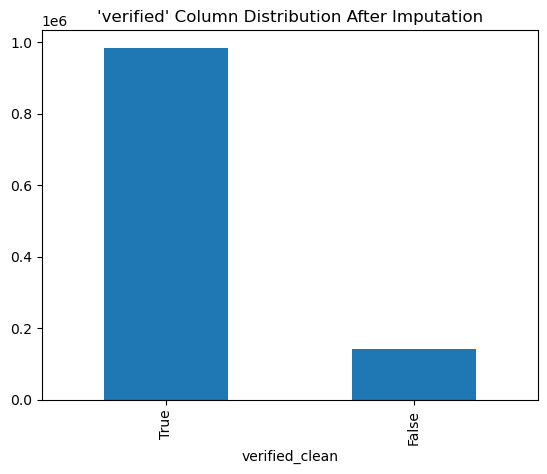

In [18]:
# Distribution after imputation
CellPhones_and_accessories_df_working_dedup['verified_clean'].value_counts().plot(kind='bar')
plt.title("'verified' Column Distribution After Imputation")
plt.show()

In [19]:
# Data treatment
# Vote imputation
# There are 178 missing values for which we will impute with 0

# Imputing missing values with 0 
CellPhones_and_accessories_df_working_dedup["vote_clean"] = CellPhones_and_accessories_df_working_dedup["vote"].fillna(0)

# Checking the imputation
print(CellPhones_and_accessories_df_working_dedup['vote_clean'].isnull().sum())  # Should be 0 after imputation

0


In [20]:
# Data treatment
# Image URL availability

# Defining a regular expression for URL validation
# Observed from the data that non-null values have https pattern
url_regex = r"https?://\S+"  

# Creating a new column with flag based on URL presence
CellPhones_and_accessories_df_working_dedup['image_available'] = CellPhones_and_accessories_df_working_dedup['image'].apply(lambda x: 
                                                                                            bool(re.match(url_regex, str(x))))

# Check
CellPhones_and_accessories_df_working_dedup.tail()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewTime_cleaned,verified_clean,vote_clean,image_available
1128432,4,True,"12 22, 2016",A1QWMCG1FNEP3A,B01HJC7N4C,NaN,Amazon Customer,Good for viewing. But doesn't have a button or...,Good,1482364800,NaN,NaN,2016-12-22,True,0,False
1128433,5,False,"07 15, 2016",A3FOBEJ9UVUTR3,B01HJC7N4C,NaN,David Harlow,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,NaN,NaN,2016-07-15,False,0,False
1128434,5,False,"07 14, 2016",AMUEAMKB4E33M,B01HJC7N4C,NaN,Tom D,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,NaN,['https://images-na.ssl-images-amazon.com/imag...,2016-07-14,False,0,False
1128435,5,False,"07 13, 2016",A2EV91MMOJ3IL4,B01HJC7N4C,NaN,Timber12,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,NaN,NaN,2016-07-13,False,0,False
1128436,5,True,"05 11, 2017",ARKQD9Z1VPOV2,B01HJH9IN6,NaN,Malfacini,i love it,Five Stars,1494460800,NaN,NaN,2017-05-11,True,0,False


## Creating the dependent variable - helpfulness

In [21]:
CellPhones_and_accessories_df_working_dedup.dtypes
# vote_clean is a string, needs to be converted to numeric

CellPhones_and_accessories_df_working_dedup["vote_clean"] = pd.to_numeric(CellPhones_and_accessories_df_working_dedup["vote_clean"], errors='coerce')

In [22]:
#appliances_df_working_dedup.dtypes
CellPhones_and_accessories_df_working_dedup.describe()

,overall,unixReviewTime,reviewTime_cleaned,vote_clean
count,1.124986e+06,1.124986e+06,1124986,1.124968e+06
mean,4.222059e+00,1.440661e+09,2015-08-27 07:42:56.755265792,7.497191e-01
min,1.000000e+00,1.035331e+09,2002-10-23 00:00:00,0.000000e+00
25%,4.000000e+00,1.416614e+09,2014-11-22 00:00:00,0.000000e+00
50%,5.000000e+00,1.444435e+09,2015-10-10 00:00:00,0.000000e+00
75%,5.000000e+00,1.470528e+09,2016-08-07 00:00:00,0.000000e+00
max,5.000000e+00,1.538438e+09,2018-10-02 00:00:00,9.950000e+02
std,1.231447e+00,4.526082e+07,NaN,8.694376e+00


In [23]:
CellPhones_and_accessories_df_working_dedup.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewTime_cleaned,verified_clean,vote_clean,image_available
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,2014-08-04,True,0.0,False
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,2014-02-12,True,0.0,False
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,2014-02-08,True,0.0,False
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,2014-02-04,True,0.0,False
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,2014-02-03,True,0.0,False


In [24]:
CellPhones_and_accessories_df_working_dedup['vote_clean'].dtype

dtype('float64')

In [25]:
# Checking for non-numeric values after conversion
non_numeric_count = CellPhones_and_accessories_df_working_dedup["vote_clean"].isna().sum()
if non_numeric_count > 0:
    print(f"Warning: {non_numeric_count} non-numeric values in vote_clean after conversion")


In [26]:
CellPhones_and_accessories_df_working_dedup["vote_clean"].unique()

array([  0.,   2.,   9.,   4.,   8.,   3.,  19.,  10.,   7.,   5.,  16.,
        12.,  26.,  11.,   6.,  20.,  14.,  77., 120.,  15.,  23.,  35.,
        18.,  31.,  36.,  96., 441.,  13.,  87.,  22.,  17.,  99.,  71.,
        25.,  28.,  24., 170.,  72.,  40.,  30.,  32., 183.,  59.,  44.,
        37.,  47.,  42.,  29., 259.,  43., 104.,  38., 251.,  21.,  97.,
        27., 160., 257.,  55., 682., 210.,  41.,  52.,  39., 148.,  82.,
        56.,  49.,  51., 125., 253.,  33.,  48.,  76.,  61., 323.,  60.,
       101., 124.,  53.,  46., 394., 287.,  81., 143., 154., 150., 115.,
       110., 141., 315.,  50., 280.,  58.,  85.,  75., 238.,  57., 301.,
       119.,  65., 132.,  73.,  78.,  34., 122.,  54., 111.,  63., 753.,
        66., 112.,  62., 193.,  45., 106., 188., 179., 718.,  64., 333.,
       511., 163., 216., 570., 192., 213., 435., 139., 118., 438.,  86.,
       271., 331., 100., 324., 509., 187., 169., 165.,  94.,  69.,  98.,
       153.,  90., 157.,  70., 142., 105., 494.,  8

In [27]:
# For some reason, nan isn't going away, dropping 2 rows
CellPhones_and_accessories_df_working_dedup = CellPhones_and_accessories_df_working_dedup.dropna(subset=["vote_clean"]) 

In [28]:
CellPhones_and_accessories_df_working_dedup.shape

(1124968, 16)

Percentile Distribution of Votes:
   Percentile  Value
0         0.0    0.0
1         0.0    0.0
2         0.0    0.0
3         0.0    0.0
4         0.0    0.0
5         0.0    3.0
6         3.0   13.0
7        13.0  995.0


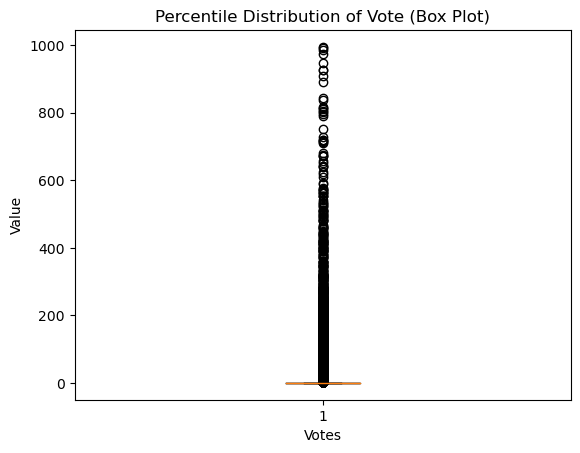

In [29]:
# Box plot of votes

# Calculate percentiles
percentiles_votes = np.percentile(CellPhones_and_accessories_df_working_dedup['vote_clean'], [0, 25, 50, 66, 75, 90, 95, 99, 100])

# Printing percentiles in a DataFrame
print("Percentile Distribution of Votes:")
print(pd.DataFrame({'Percentile': percentiles_votes[:-1], 'Value': percentiles_votes[1:]}))

# Visualizing percentiles using box plot
plt.boxplot(CellPhones_and_accessories_df_working_dedup['vote_clean'])
plt.xlabel('Votes')
plt.ylabel('Value')
plt.title('Percentile Distribution of Vote (Box Plot)')
plt.show()

# Not intuitive

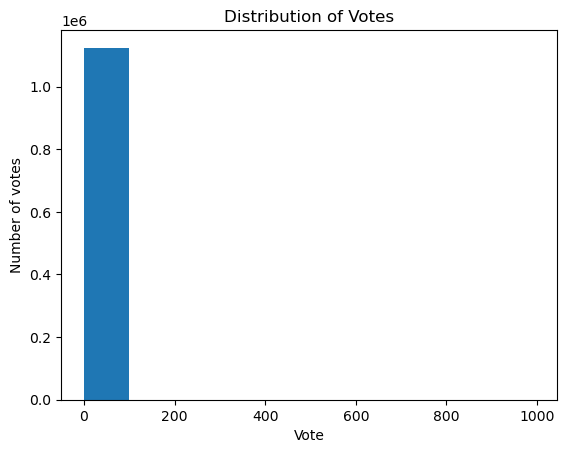

In [30]:
# Distribution of votes
plt.hist(CellPhones_and_accessories_df_working_dedup['vote_clean'])
plt.xlabel("Vote")
plt.ylabel("Number of votes")
plt.title("Distribution of Votes")
plt.show()

In [31]:
# Cross tab of vote counts
# Cross tabulation of vote counts
print(CellPhones_and_accessories_df_working_dedup['vote_clean'].value_counts().sort_index(ascending=True))

# Only 26 records have votes i.e. 12.7%

vote_clean
0.0      1033453
2.0        33058
3.0        15837
4.0         8939
5.0         5949
          ...   
946.0          1
973.0          1
987.0          1
992.0          1
995.0          1
Name: count, Length: 424, dtype: int64


In [32]:
# Creating our dependent variable 'helpfulness_binary' with the following conditions
# 1 if Votes > 0 and verified is True
# 0 otherwise
CellPhones_and_accessories_df_working_dedup['helpfulness_binary'] = CellPhones_and_accessories_df_working_dedup[['vote_clean', 'verified_clean']].apply(lambda x:
                                                        1 if x['vote_clean'] > 0 
                                                        and x['verified_clean'] else 0, 
                                                        axis=1)

# Checking counts
print(CellPhones_and_accessories_df_working_dedup['helpfulness_binary'].value_counts().sort_index(ascending=True))

# 10.7% of the data has 1, remaining 0
# This is imbalanced but since data volume is low, no negative sampling required

helpfulness_binary
0    1055501
1      69467
Name: count, dtype: int64


~93% of data is 0 and 6.12% of data is 1 for this category

## Feature engineering

 
#### 1) Review title (summary) metadata: 
1a) # words in title 

1b) # length of original title

1c) Similarity of title and review text (using cosine similarity or related method)

1d) Title sentiment 

1e) Unique word count 

1f) Emoji & non-ASCII character count 

1g) Term frequency/TFIDF of the cleaned title with prefix of title if summary is not similar to text (might be tricky to do)


#### 2) Review text (reviewText) metadata: 
2a) # words in review 

2b) # length of original review 

2c) Review sentiment 

2d) Unique word count 

2e) URL availability inside reviewtext 

2f) Stop word count  

2g) Emoji & non-ASCII character count 


#### 3) Star rating i.e. overall column


#### 4) Active reviewer - does the reviewer ID have multiple reviews? 1 if yes, 0 otherwise


#### 5) Age of review: (end of 2018 - review posted date) = review age in days


#### 6) Review text cleaning: 
6a) convert reviewtext to lowercase, remove double spaces, punctuations, numbers 

6b) Expand I've, We're to I have, We have etc. 

6c) Remove URLs, stopwords (standard and custom), non-ASCII characters, emojis and other non-printable characters 

6d) Remove sparse words 

6e) Stemming, lemmatization 

6f) n-grams: Check for top unigrams and bigrams - study distributions, is there a pareto? 

6g) [Optional] Long tail consolidation using PCA

#### 7) Others - for EDA/visualization purposes: 
7a) Word cloud, sentiment cloud of reviews 

7b) Comparison of distribution of ratings across helpful and non-helpful reviews - is there skew/bias? 

7c) 


In [201]:
# Function definitions

# Function for number of words in input text
def num_words(text):
    return len(word_tokenize(text))

# Function to get length of input text
def text_length(text):
    return len(text)

# Cosine similarity between 2 input texts: this may be computationally expensive
# Cosine similarity between title and review text is calculated using TF-IDF
def cosine_similarity(title, review):
    vectorizer = TfidfVectorizer()
    tf_idf_matrix = vectorizer.fit_transform([title, review])
    return (tf_idf_matrix * tf_idf_matrix.T).toarray()[0][1]

# Sentiment polarity
# <0 indicates negative sentiment
# 0 indicates netural 
# >0 indicates positive sentiment
def text_sentiment(title):
    blob = TextBlob(title)
    return blob.sentiment.polarity  

# Function to get count of unique words in the input text
def unique_word_count(text):
    return len(set(word_tokenize(text)))

# Function to get count of emojis and non-ASCII characters in input text
def emoji_and_non_ascii_count(text):
    count = 0
    for char in text:
        if (char in emoji.UNICODE_EMOJI or not char.isascii()):
            count += 1
    return count

# If UNICODE_EMOJI isn't getting installed, use this version of the function
# This uses a regex pattern to capture non-alphanumeric characters
def emoji_and_non_ascii_count_v2(text):
    emoji_pattern = r"[^a-zA-Z0-9\s+\.\!]"  
    return len(re.findall(emoji_pattern, text))

# Function to count the number of URLs inside the input text
def url_count(text):
    url_pattern = r"http[s]?://\S+"  # Regular expression for URLs
    return len(re.findall(url_pattern, text))

# Function to count the number of English stopwords in the input text
def stopword_count(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return sum(word in stop_words for word in words)


In [202]:
# Creating features 1a - 1f

# 1a: Number of words in the title
appliances_df_working_dedup['num_words_review_title'] = appliances_df_working_dedup['summary'].apply(num_words)
# 1b. length of original title
appliances_df_working_dedup['title_length'] = appliances_df_working_dedup['summary'].apply(text_length)

# 1c: Calculating similarity using cosine similarity
appliances_df_working_dedup['title_review_similarity'] = appliances_df_working_dedup[['summary', 
                                                                                      'reviewText']].apply(lambda x: 
                                                                                                            cosine_similarity(x['summary'], 
                                                                                                                              x['reviewText']), 
                                                                                                            axis=1)

# 1d: Sentiment polarity 
appliances_df_working_dedup['title_sentiment'] = appliances_df_working_dedup['summary'].apply(text_sentiment)

# 1e: Unique word count
appliances_df_working_dedup['unique_word_count_title'] = appliances_df_working_dedup['summary'].apply(unique_word_count)

# 1f: Emoji & non-ASCII character count 
#appliances_df_working_dedup['emoji_non_ascii_count_title'] = appliances_df_working_dedup['summary'].apply(emoji_and_non_ascii_count)

# 1f: Emoji & non-ASCII character count v2
appliances_df_working_dedup['emoji_non_ascii_count_title'] = appliances_df_working_dedup['summary'].apply(emoji_and_non_ascii_count_v2)


# Check
print(appliances_df_working_dedup)

      overall  verified   reviewTime      reviewerID        asin  \
0           5      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1           5      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2           5      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3           5      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4           5      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   
...       ...       ...          ...             ...         ...   
2262        5      True  08 29, 2014  A1H2V1GNEY4LZ0  B00W4YKCGC   
2263        5      True  08 11, 2014   AVGG8CYK8K312  B00W4YKCGC   
2274        5      True  10 15, 2016  A13391AZAFJ67K  B00570RQ0A   
2275        5      True   01 5, 2016  A2V0JXLJ9VCNNX  B00570RQ0A   
2276        5      True   12 5, 2016  A3GP2HMB2AFOKF  B00W4YKCGC   

                          style     reviewerName  \
0     {'Style:': ' Dryer Vent'}    James. Backus   
1          {'Size:': ' 6-Foot'}           kevin.   
2          {'Size:': ' 6-Fo

In [203]:
# Creating features 2a - 2g

# 2a: Number of words in the review
appliances_df_working_dedup['num_words_review_review'] = appliances_df_working_dedup['reviewText'].apply(num_words)

# 2b. length of original review
appliances_df_working_dedup['review_length'] = appliances_df_working_dedup['reviewText'].apply(text_length)

# 2c: Sentiment polarity of review 
appliances_df_working_dedup['review_sentiment'] = appliances_df_working_dedup['reviewText'].apply(text_sentiment)

# 2d: Unique word count
appliances_df_working_dedup['unique_word_count_review'] = appliances_df_working_dedup['reviewText'].apply(unique_word_count)

# 2e: URL count inside reviewtext
appliances_df_working_dedup['url_count_review'] = appliances_df_working_dedup['reviewText'].apply(url_count)

# 2f: Stop word count 
appliances_df_working_dedup['stop_word_count_review'] = appliances_df_working_dedup['reviewText'].apply(stopword_count)

# 2g: Emoji & non-ASCII character count 
appliances_df_working_dedup['emoji_non_ascii_count_title'] = appliances_df_working_dedup['reviewText'].apply(emoji_and_non_ascii_count_v2)

# Check
print(appliances_df_working_dedup)

      overall  verified   reviewTime      reviewerID        asin  \
0           5      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1           5      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2           5      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3           5      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4           5      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   
...       ...       ...          ...             ...         ...   
2262        5      True  08 29, 2014  A1H2V1GNEY4LZ0  B00W4YKCGC   
2263        5      True  08 11, 2014   AVGG8CYK8K312  B00W4YKCGC   
2274        5      True  10 15, 2016  A13391AZAFJ67K  B00570RQ0A   
2275        5      True   01 5, 2016  A2V0JXLJ9VCNNX  B00570RQ0A   
2276        5      True   12 5, 2016  A3GP2HMB2AFOKF  B00W4YKCGC   

                          style     reviewerName  \
0     {'Style:': ' Dryer Vent'}    James. Backus   
1          {'Size:': ' 6-Foot'}           kevin.   
2          {'Size:': ' 6-Fo

In [204]:
# Feature 4: active reviewer

# Finding the count the rows (reviews) across the dataset
review_counts = appliances_df_working_dedup.groupby('reviewerID')['reviewerID'].size().to_frame(name='review_count')

# Joining the review counts back to the original dataframe on reviewerID
appliances_df_working_dedup = appliances_df_working_dedup.merge(review_counts, on='reviewerID', how='left')

# Check
print(appliances_df_working_dedup)

     overall  verified   reviewTime      reviewerID        asin  \
0          5      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1          5      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2          5      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3          5      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4          5      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   
..       ...       ...          ...             ...         ...   
199        5      True  08 29, 2014  A1H2V1GNEY4LZ0  B00W4YKCGC   
200        5      True  08 11, 2014   AVGG8CYK8K312  B00W4YKCGC   
201        5      True  10 15, 2016  A13391AZAFJ67K  B00570RQ0A   
202        5      True   01 5, 2016  A2V0JXLJ9VCNNX  B00570RQ0A   
203        5      True   12 5, 2016  A3GP2HMB2AFOKF  B00W4YKCGC   

                         style     reviewerName  \
0    {'Style:': ' Dryer Vent'}    James. Backus   
1         {'Size:': ' 6-Foot'}           kevin.   
2         {'Size:': ' 6-Foot'}        CDBr

In [205]:
# 5) Age of review: (end of 2018 - review posted date) = review age in days
 
# Calculating the end date of 2018 as the reference date since the dataset is as of 2018
end_of_2018 = datetime(2018, 12, 31)

# Converting datetime64[ns] to pandas datetime
if pd.api.types.is_datetime64_dtype(appliances_df_working_dedup['reviewTime_cleaned']): 
    appliances_df_working_dedup['reviewTime_cleaned'] = pd.to_datetime(appliances_df_working_dedup['reviewTime_cleaned'])

# Calculating the age in days 
appliances_df_working_dedup['review_age_days'] = (end_of_2018 - appliances_df_working_dedup['reviewTime_cleaned']).dt.days


In [206]:
# Check
appliances_df_working_dedup.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,unique_word_count_title,emoji_non_ascii_count_title,num_words_review_review,review_length,review_sentiment,unique_word_count_review,url_count_review,stop_word_count_review,review_count,review_age_days
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,...,2,0,35,157,0.400000,26,0,16,4,1957
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,...,2,0,2,9,0.700000,2,0,0,3,1057
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,...,2,0,7,30,0.512121,7,0,1,3,1244
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,...,2,0,5,30,0.700000,5,0,1,4,1347
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,...,2,0,6,33,1.000000,6,0,2,6,1381


In [209]:
# 6: Text cleaning

# Defining a master function that will do the following for a provided input text: 
# 6a) Lowercase and remove double spaces
# 6b) Expand contractions
# 6c) Remove unwanted characters, numbers, punctuations
def clean_text_master_function(text):

  # 6a) Lowercase and remove double spaces
    text = text.lower()
    text = re.sub(r"\s\s+", " ", text)  # Replace double spaces with single space

  # 6b) Expanding contractions
    #text = re.sub(r"i'm", "i am", text)
    #text = re.sub(r"we're", "we are", text)
    text = contractions.fix(text)
  # Add more contractions as needed

  # 6c) Remove unwanted characters
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\x00-\x7F]+", "", text)  # Remove non-ASCII characters
    # HTML tags to be removed
    text = re.sub(r"<.*?>", "", text)
    # Remove emojis and other non-alphanumeric characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing numbers 
    text = re.sub(r"[0-9]"," ",text)
    # Acronyms and abbreviations - add code if required
                          
    # Basic typo corrections: 
    text = TextBlob(text).correct()
    
    # Resolving acronyms and abbreviations - add more as required
    acronyms_abbrs =  { 
                        "tbh": "to be honest",
                        "2mw": "tomorrow", 
                        "lol": "laugh out load", 
                        "fyi": "for your information", 
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "gr8" : "great",
                        "omg" : "oh my god",
                        "omw" : "on my way"
                            }
    
     # Iterating through the dictionary and replace acronyms
    for acronym, full_form in acronyms_abbrs.items():
        text = text.replace(acronym, full_form)
    
    # Custom stopwords (add to list here as required)
    custom_stopwords = ["amazon"]
    stop_words = stopwords.words("english") + custom_stopwords
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Tokenization
    text = word_tokenize(text)
    
    return text


In [210]:
# Applying the cleaning function to the reviewText column
appliances_df_working_dedup['review_text_clean'] = appliances_df_working_dedup['reviewText'].apply(clean_text_master_function)


In [211]:
appliances_df_working_dedup['review_text_clean'].head()

0    [like, vent, well, something, keep, house, war...
1                                         [good, item]
2                         [fit, new, dwyer, perfectly]
3                      [good, value, electric, orders]
4                         [price, delivery, excellent]
Name: review_text_clean, dtype: object

In [213]:
# Creating functions for stemming and lemmatization

# Using Lancaster Stemming method to identify root words
def stem_text(text):
    stemmer = LancasterStemmer()
    return [stemmer.stem(token) for token in text]

# Using WordNet Lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in text]

In [214]:
# Apply stemming and lemmatization as new columns
appliances_df_working_dedup['review_text_clean_stemmed'] = appliances_df_working_dedup['review_text_clean'].apply(stem_text)
appliances_df_working_dedup['review_text_clean_lemmatized'] = appliances_df_working_dedup['review_text_clean'].apply(lemmatize_text)

# Not using as of now but good to have

In [215]:
appliances_df_working_dedup.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'reviewTime_cleaned', 'verified_clean', 'vote_clean',
       'image_available', 'helpfulness_binary', 'num_words_review_title',
       'title_length', 'title_review_similarity', 'title_sentiment',
       'unique_word_count_title', 'emoji_non_ascii_count_title',
       'num_words_review_review', 'review_length', 'review_sentiment',
       'unique_word_count_review', 'url_count_review',
       'stop_word_count_review', 'review_count', 'review_age_days',
       'review_text_clean', 'review_text_clean_stemmed',
       'review_text_clean_lemmatized'],
      dtype='object')

In [216]:
appliances_df_working_dedup['review_text_clean'].head

<bound method NDFrame.head of 0      [like, vent, well, something, keep, house, war...
1                                           [good, item]
2                           [fit, new, dwyer, perfectly]
3                        [good, value, electric, orders]
4                           [price, delivery, excellent]
                             ...                        
199                              [work, perfectly, time]
200                 [use, regular, jobs, love, pricking]
201                                               [good]
202                                    [washed, washing]
203                     [great, product, fast, shipping]
Name: review_text_clean, Length: 204, dtype: object>

In [217]:
'''
This function compares the distribution of top n-grams (unigrams or bigrams) for two groups in a DataFrame.

Args:
  df: The DataFrame containing the text data and a column for the comparison group ('helpfulness_binary').
  helpfulness_values: A list of the two values to compare (e.g., [1, 0] for helpfulness).
  n: The n-gram value (1 for unigrams, 2 for bigrams).
  top_n: Number of top n-grams to visualize (default: 20)
'''

# The function output is the visualization of the top n-grams for a given dataframe
def compare_top_ngram_distribution(df, helpfulness_values, n, top_n=20):
  # Creating TF-IDF vectorizer
    vectorizer = TfidfVectorizer(ngram_range=(n, n), lowercase=True, sublinear_tf=True)

  # Handling lists of tokens in 'review_text_clean'
    def preprocess_text(text):
        if isinstance(text, list):
            return ' '.join(text)
        else:
            return text

    # Preprocessing text and fit vectorizer
    data = df['review_text_clean'].apply(preprocess_text)
    vectorizer.fit_transform(data)

    # Getting TF-IDF scores for each helpfulness value
    tfidf_matrix = vectorizer.transform(data)
    tfidf_by_helpfulness = {val: tfidf_matrix[df['helpfulness_binary'] == val].toarray() for val in helpfulness_values}

    # Getting vocabulary
    vocabulary = vectorizer.get_feature_names_out()

    # Calculating average TF-IDF scores for top n-grams per helpfulness value
    top_ngram_scores = {}
    for val in helpfulness_values:
        tfidf_data = tfidf_by_helpfulness[val]
        top_ngram_indices = tfidf_data.sum(axis=0).argsort()[-top_n:]  # Get indices of top n words by sum of TF-IDF
        top_ngram_scores[val] = [ (vocabulary[i], tfidf_data[:, i].mean()) for i in top_ngram_indices ]

  # Preparing data for visualization (separate lists for ngrams and TF-IDF by helpfulness)
    ngrams = []
    avg_tfidf_by_helpfulness = {}
    for val, scores in top_ngram_scores.items():
        ngrams.extend([ngram for ngram, _ in scores])  # ngram for labels
        avg_tfidf_by_helpfulness[f"Helpfulness={val}"] = [tfidf for _, tfidf in scores]

  # Sorting together by TF-IDF (descending)
    sorted_data = sorted(zip(ngrams, *avg_tfidf_by_helpfulness.values()), key=lambda x: x[1], reverse=True)
    sorted_ngrams, *sorted_tfidf_by_helpfulness = zip(*sorted_data)

  # Creating colors for each helpfulness value (adjust as needed)
    colors = ['blue', 'orange']

  # Creating clustered column chart
    x = range(len(sorted_ngrams))  # x-axis positions
    bar_width = 0.35  # Adjust bar width for better visualization
    plt.bar(x[:top_n], sorted_tfidf_by_helpfulness[0][:top_n], bar_width, label=f"Helpfulness={helpfulness_values[0]}", color=colors[0])
    plt.bar([p + bar_width for p in x[:top_n]], sorted_tfidf_by_helpfulness[1][:top_n], 
            bar_width, label=f"Helpfulness={helpfulness_values[1]}", color=colors[1])

  # Setting x-axis labels with rotation for readability
    plt.xticks([p + bar_width/2 for p in x[:top_n]], sorted_ngrams[:top_n], rotation=45)
    plt.xlabel("Top N-Grams")
    plt.ylabel("Average TF-IDF Score")
    plt.title(f"Distribution of Top {n}-Gram TF-IDF Scores by Helpfulness Rating")
    plt.legend()
    plt.tight_layout()
    plt.show()


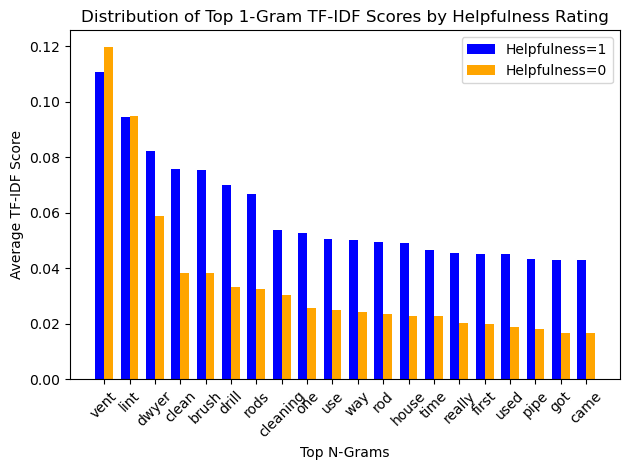

In [218]:
helpfulness_values = [1, 0]  # List of helpfulness ratings to compare

# Compare top 20 unigram distribution 
compare_top_ngram_distribution(appliances_df_working_dedup.copy(), helpfulness_values, 1, top_n=20)

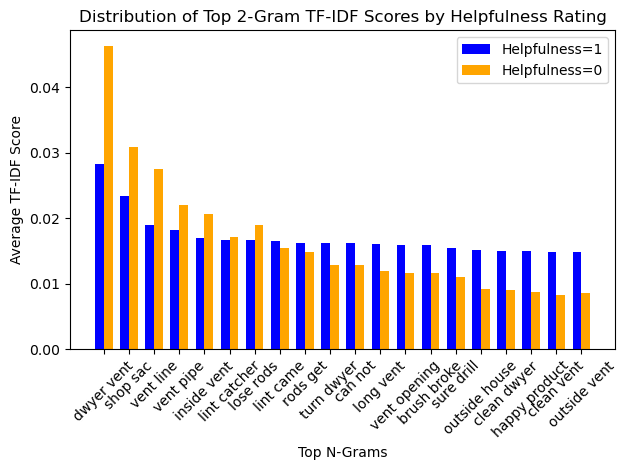

In [219]:
# Compare top 20 bigram distribution
compare_top_ngram_distribution(appliances_df_working_dedup.copy(), helpfulness_values, 2, top_n=20)


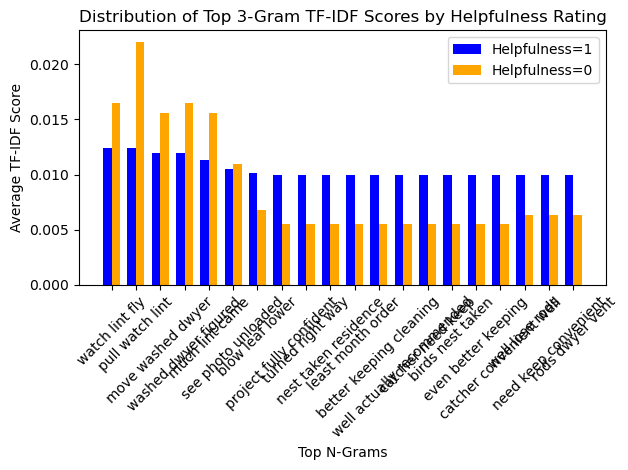

In [220]:
# Compare top 20 trigram distribution
compare_top_ngram_distribution(appliances_df_working_dedup.copy(), helpfulness_values, 3, top_n=20)


## Modeling

In [222]:
import itertools

# Creating modeling dataset
# Creating a copy of the DataFrame to avoid modifying the original
modeling_df = appliances_df_working_dedup.copy()

# Defining the columns to be taken in modeling dataset
review_text_column = 'review_text_clean'
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)
other_meta_features = [ 
                  'image_available', 
                  'title_length', 
                  'num_words_review_title', 
                  'title_review_similarity', 
                  'title_sentiment', 
                  'unique_word_count_title', 
                  'emoji_non_ascii_count_title',
                  'review_length', 
                  'review_sentiment',
                  'num_words_review_review', 
                  'url_count_review', 
                  'unique_word_count_review', 
                  'stop_word_count_review', 
                  'review_age_days'
                 ]  

tokenized_text = modeling_df['review_text_clean'].apply(lambda x: ' '.join(x))

# Creating TF-IDF vectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(tokenized_text)

# Converting TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,able,accidentally,accompanies,according,acquire,acts,actually,adam,adapted,add,...,wrapped,write,wrote,year,yearly,years,yes,yet,yourselferexcellent,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
# Combining TF-IDF features with other features
X = pd.concat([tfidf_df, modeling_df[other_meta_features], modeling_df[target_column]], axis=1)

In [224]:
X

,able,accidentally,accompanies,according,acquire,acts,actually,adam,adapted,add,...,unique_word_count_title,emoji_non_ascii_count_title,review_length,review_sentiment,num_words_review_review,url_count_review,unique_word_count_review,stop_word_count_review,review_age_days,helpfulness_binary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,157,0.400000,35,0,26,16,1957,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,9,0.700000,2,0,2,0,1057,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,30,0.512121,7,0,7,1,1244,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,30,0.700000,5,0,5,1,1347,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,33,1.000000,6,0,6,2,1381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,27,1.000000,6,0,6,2,1585,0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,53,0.250000,12,0,11,5,1603,0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,4,0.700000,1,0,1,0,807,0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,14,0.000000,2,0,2,0,1091,0


In [225]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, modeling_df[target_column], test_size=0.2, random_state=123)

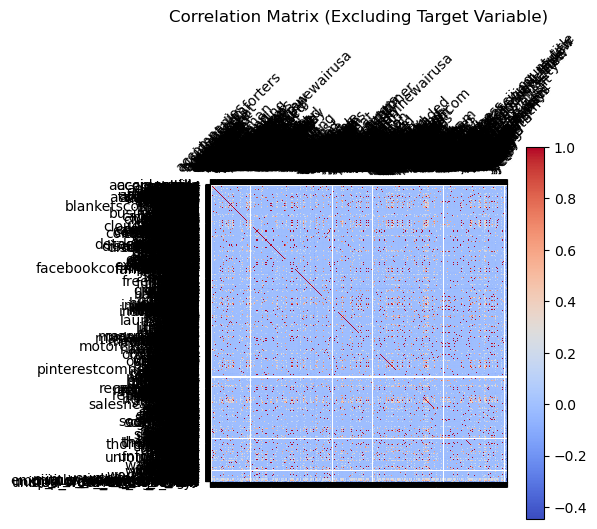

In [226]:
# Calculate correlation matrix (excluding target variable)
correlation_matrix = X_train.corr().drop(target_column, axis=1)

# Visualize correlation matrix using heatmap
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix (Excluding Target Variable)')
plt.show()

# Improvement: use only metadata feature columns instead of all columns
# Chart is too noisy becuase of large tfidf matrix

In [227]:
# Defining random XGBoost model parameters (hyperparameters to be tuned later)
model_params = {
    'objective': 'binary:logistic',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Creating and train the XGBoost model
xgb_model = XGBClassifier(**model_params)
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         4

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

